In [1]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import torch
from sklearn.datasets import make_blobs

In [2]:
matplotlib.rcParams.update({
    'font.family': 'Arial',
    'font.size': 15.0,
})

In [3]:
N = 5000
D = 2
K = 10
iters = 100

In [4]:
X, y = make_blobs(n_samples=N, centers=K, n_features=D, random_state=0)
data = torch.from_numpy(X).float()

In [5]:
centers = data[:K]

In [6]:
for i in range(iters):
    distances = (torch.cdist(data, centers))**2
    assign_idx = distances.argmin(dim=1, keepdims=True)
    centers.zero_()
    centers = torch.scatter_add(centers, 0, assign_idx.repeat(1, D), data)
    counts = torch.zeros(K, 1)
    counts = torch.scatter_add(counts, 0, assign_idx, torch.ones(N, 1))
    centers = centers / (counts + 1e-10)

In [7]:
plt.figure(figsize=(8, 8))
plt.scatter(data[:, 0], data[:, 1], c=assign_idx, cmap='jet', s=20)
plt.scatter(centers[:, 0], centers[:, 1], s=60, c='w', edgecolor='k')
plt.tight_layout()
# plt.savefig('kmeans.png')

In [20]:
centers = data[0].unsqueeze(0)
for i in range(1, K):
    distances = (torch.cdist(data, centers))**2
    min_dist = distances.min(dim=1)[0]
    prob = min_dist / (min_dist.sum() + 1e-10)
    idx = torch.multinomial(prob, 1)
    centers = torch.cat([centers, data[idx]])

In [21]:
for i in range(iters):
    distances = (torch.cdist(data, centers))**2
    assign_idx = distances.argmin(dim=1, keepdims=True)
    centers.zero_()
    centers = torch.scatter_add(centers, 0, assign_idx.repeat(1, D), data)
    counts = torch.zeros(K, 1)
    counts = torch.scatter_add(counts, 0, assign_idx, torch.ones(N, 1))
    centers = centers / (counts + 1e-10)

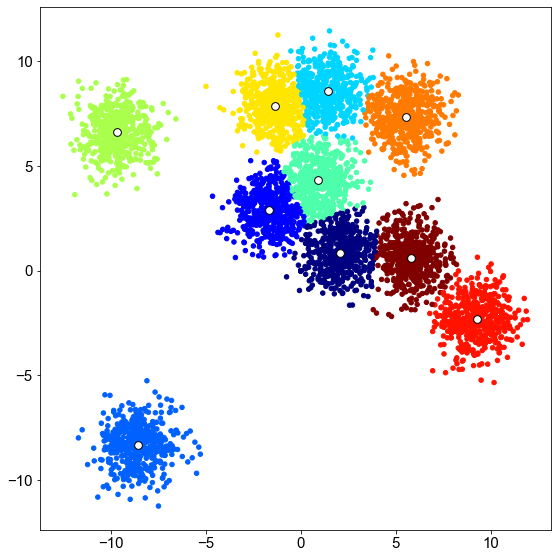

In [22]:
plt.figure(figsize=(8, 8))
plt.scatter(data[:, 0], data[:, 1], c=assign_idx, cmap='jet', s=20)
plt.scatter(centers[:, 0], centers[:, 1], s=60, c='w', edgecolor='k')
plt.tight_layout()
# plt.savefig('kmeans++.png')

In [15]:
centers = data[torch.randint(0, N, (K,))]
all_assign_idx = torch.zeros(N, 1).long()
total_counts = torch.zeros(K, 1)
B = 256
iters = 100
for i in range(iters):
    sample_idx = torch.randint(0, N, (B,))
    batch = data[sample_idx]
    distances = (torch.cdist(batch, centers))**2
    assign_idx = distances.argmin(dim=1, keepdims=True)
    all_assign_idx[sample_idx] = assign_idx
    update = torch.zeros(K, D)
    update = torch.scatter_add(update, 0, assign_idx.repeat(1, D), batch)
    counts = torch.zeros(K, 1)
    counts = torch.scatter_add(counts, 0, assign_idx, torch.ones(B, 1))
    centers = (total_counts * centers + update) / (total_counts + counts + 1e-10)

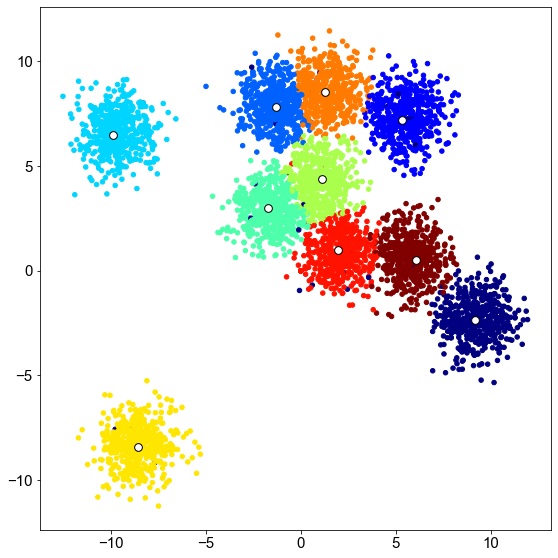

In [16]:
plt.figure(figsize=(8, 8))
plt.scatter(data[:, 0], data[:, 1], c=all_assign_idx, cmap='jet', s=20)
plt.scatter(centers[:, 0], centers[:, 1], s=60, c='w', edgecolor='k')
plt.tight_layout()
# plt.savefig('batch-kmeans.png')